# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Yash Kumar
##### **Team Member 2 -** Taniya Yadav
##### **Team Member 3 -** Vivek Mishra


# **Project Summary -**

The airline industry plays a crucial role in modern transportation, with numerous airlines serving various routes worldwide. To make informed decisions in this highly competitive industry, airlines and stakeholders rely on data-driven insights. Machine learning models are indispensable tools in this regard, allowing for the classification of airlines based on different criteria. This document outlines the development and implementation of an airline classification machine learning model.


This is where machine learning can play a vital role. By using historical customer data, a machine learning model can identify patterns and correlations that indicate a high likelihood of referral. This information can then be used by airlines to target specific customers with personalized marketing campaigns or incentives, increasing the chances of referral and promoting growth.


In conclusion, a machine learning model that predicts the likelihood of referral can provide valuable insights for airlines looking to enhance their customer satisfaction and drive growth through word-of-mouth referrals.



In [1]:

from IPython.display import Image
Image(url='https://qph.cf2.quoracdn.net/main-qimg-445f62ae8197749e4c4114e6ab7fd4b8',
        width=1250,height=500)


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The goal of this machine learning project is to classify airlines into categories based on certain features or attributes. Classification can serve multiple purposes, such as identifying potential partners for codeshare agreements, assisting in pricing strategies, or aiding in market analysis. In this project, We will be exploring if flyers would recommend the airline to their friends and families, based on their travel experience,reviews and ratings.

#### There are few problems that we are looking in this project:

* Develop a classification model to categorize airlines based on the likelihood of customers recommending them to friends and family.

* Recognize the pivotal role of customer satisfaction and referrals in the growth and success of airlines.

* Enable airlines to strategically utilize customer referral information for codeshare agreements, pricing strategies, and market analysis.

* Identify customers likely to refer the airline, a task complicated by the diverse factors influencing satisfaction and referrals.

* Assess the model's capability to provide actionable insights for airlines to tailor services, improve customer satisfaction, and enhance brand reputation.


This problem statement outlines the key objectives, challenges, and considerations for developing a classification model to predict customer referrals in the airline industry.

In [2]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/3ohc1fLZXOyhE4LOKc/giphy.gif?cid=790b76111m6jkxiorvqwjv0dmol4yn9pg3f8b0g0h0etfwz7&ep=v1_gifs_search&rid=giphy.gif&ct=g', width=1250,height=400)

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00


In [5]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Dataset Loading

In [6]:
df1 =pd.read_excel('/content/drive/MyDrive/module_6_end_course/Dataset/data_airline_reviews.xlsx')

### Dataset First View

In [7]:
# Dataset First Look
df1.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
df1.shape

(131895, 17)

### Dataset Information

In [9]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df1.duplicated().sum()

70711

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df1.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

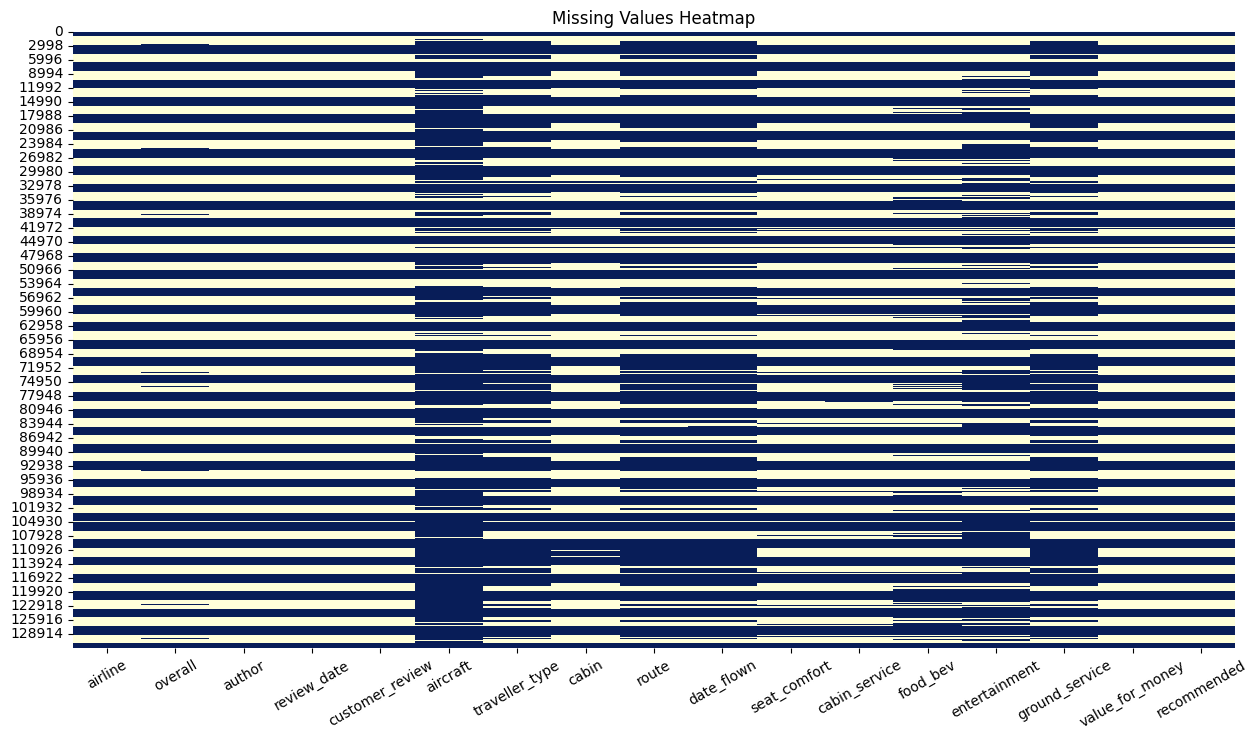

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.isnull(), cbar=False, cmap='YlGnBu')
plt.title('Missing Values Heatmap')
plt.xticks(rotation=30)
plt.show()

### What did you know about your dataset?

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with user feedback ratings and reviews based on their travel experience.

It has 131895 rows 17 different columns.

Data is scraped in Spring 2019. Feature descriptions briefly as follows:

1. **airline** - Airline name
2. **overall** - Overall score
3. **Author** - Author information
4. **review_date** - Customer Review posted date
5. **Customer_review** - Actual customer review(Textual)
6. **aircraft** - Type of aircraft
7. **traveller_type** - Type of traveller
8. **cabin**- Cabin type chosen by traveller (Economy, Business,Premium economy,First class)
9. **route** - Route flown by flyer
10. **date_flown** - Date of travel
11. **seat_comfort** - Rating provided towards seat comfort
12. **cabin_service** - Rating provided towards cabin service.
13. **food_bev** - Rating provided towards food and beverages supplied during travel.
14. **entertainment** - Rating provided towards on board flight entertainment
15. **ground_service** - Rating provided towards ground service staff.
16. **value_for_money** - Rating provided towards value for money.
17. **recommended** - Airline service Recommended by flyer (Yes/No)

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df1.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [14]:
# Dataset Describe
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,64017.0,5.145430,3.477532,1.0,1.0,5.0,9.0,10.0
seat_comfort,60681.0,2.952160,1.441362,1.0,1.0,3.0,4.0,5.0
cabin_service,60715.0,3.191814,1.565789,1.0,2.0,3.0,5.0,5.0
food_bev,52608.0,2.908170,1.481893,1.0,1.0,3.0,4.0,5.0
entertainment,44193.0,2.863372,1.507262,1.0,1.0,3.0,4.0,5.0
ground_service,39358.0,2.692820,1.612215,1.0,1.0,3.0,4.0,5.0
value_for_money,63975.0,2.943962,1.587370,1.0,1.0,3.0,4.0,5.0


### Variables Description

It has lot of blank rows with many null values and the columns description are as follows:

1. **airline** - Name of the airline.  (**object type**)
2. **overall** - Overall rating defined by customer. (**float type**)
3. **Author** - Customer information. (**object type**)
4. **review_date** - date on which customer posted a review. (**object type**)
5. **Customer_review** - Description of customer review. (**object type**)
6. **aircraft** - Type of aircraft. (**object type**)
7. **traveller_type** - Type of traveller. (**object type**)
8. **cabin**- Cabin type chosen by traveller. (Economy, Business,Premium economy,First class) (**object type**)
9. **route** - Route flown by flyer. (**object type**)
10. **date_flown** - Date of travel. (**object type**)
11. **seat_comfort** - Rating provided towards seat comfort. (**float type**)
12. **cabin_service** - Rating provided towards cabin service. (**float type**)
13. **food_bev** - Rating provided towards food and beverages supplied during travel. (**float type**)
14. **entertainment** - Rating provided towards on board flight entertainment. (**float type**)
15. **ground_service** - Rating provided towards ground service staff. (**float type**)
16. **value_for_money** - Rating provided towards value for money. (**float type**)
17. **recommended** - Airline service Recommended by flyer (Yes/No). (**object type**)

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
dict_uniq_value={}
dict_uniq_cnt={}
for i in df1.columns:
  dict_uniq_value[i]=df1[i].unique()
  dict_uniq_cnt[i]=len(df1[i].unique())

In [16]:
print(dict_uniq_value['airline'])
print(dict_uniq_cnt['airline'])

[nan 'Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' 'Air China'
 'Cathay Pacific Airways' 'Wi

In [17]:
for i in df1.columns.tolist():
  print("No. of unique values in ",i,"is",df1[i].nunique())

No. of unique values in  airline is 81
No. of unique values in  overall is 10
No. of unique values in  author is 44069
No. of unique values in  review_date is 3015
No. of unique values in  customer_review is 61172
No. of unique values in  aircraft is 2088
No. of unique values in  traveller_type is 4
No. of unique values in  cabin is 4
No. of unique values in  route is 24549
No. of unique values in  date_flown is 63
No. of unique values in  seat_comfort is 5
No. of unique values in  cabin_service is 5
No. of unique values in  food_bev is 5
No. of unique values in  entertainment is 5
No. of unique values in  ground_service is 5
No. of unique values in  value_for_money is 5
No. of unique values in  recommended is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Make a copy of your dataset for in future revert back
df=df1.copy()

In [19]:
#Drop all duplicated rows as there are many blank and duplicated rows
df.drop_duplicates(inplace=True)

In [20]:
#Drop the index column
df.reset_index(drop=True, inplace=True)

In [21]:
#Check for shape of your dataset
df.shape

(61184, 17)

In [22]:
#check for null values and sort in ascending order
df.isnull().sum().sort_values(ascending=False)

aircraft           42696
ground_service     24015
date_flown         23750
route              23671
traveller_type     23644
entertainment      20954
food_bev           12843
seat_comfort        4973
cabin_service       4944
cabin               2479
value_for_money     1857
overall             1783
recommended         1423
customer_review        1
review_date            1
author                 1
airline                1
dtype: int64

In [23]:
#Drop unwanted columns that is not used for our analysis
df.drop(columns=(['author','customer_review','route']),axis=1,inplace=True)

In [24]:
#In this we have too many null values so we dropped it and it can't be filled also
df.drop(columns=['aircraft'],axis=1,inplace=True)

In [25]:
# Again check for null values and sort in ascending order
df.isnull().sum().sort_values(ascending=False)

ground_service     24015
date_flown         23750
traveller_type     23644
entertainment      20954
food_bev           12843
seat_comfort        4973
cabin_service       4944
cabin               2479
value_for_money     1857
overall             1783
recommended         1423
airline                1
review_date            1
dtype: int64

In [26]:
#Drop null values for these 2 columns
df.dropna(subset=(['ground_service','entertainment']),inplace=True)

In [27]:
# Again check for null values and sort in ascending order
df.isnull().sum().sort_values(ascending=False)

food_bev           782
cabin               13
date_flown          10
traveller_type       2
overall              1
seat_comfort         1
cabin_service        1
airline              0
review_date          0
entertainment        0
ground_service       0
value_for_money      0
recommended          0
dtype: int64

In [28]:
#Fill the null vales with mean fo their rating
df['food_bev'].fillna(df['food_bev'].mean(),inplace=True)

In [29]:
#Drop all null values in our whole dataset
df.dropna(inplace=True)

In [30]:
#Final check for null values
df.isnull().sum()

airline            0
overall            0
review_date        0
traveller_type     0
cabin              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [31]:
# Check for shape after cleaning or dataset
df.shape

(23606, 13)

In [32]:
#First row is all null values so after we dropped it our index starts from 1 so we are resetting or index
df.reset_index(drop=True, inplace=True)

In [33]:
#Check first 5 rows of dataset after cleaning
df.head()

,airline,overall,review_date,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,8th May 2019,Business,Economy Class,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,7th May 2019,Family Leisure,Economy Class,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,7th May 2019,Business,Economy Class,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,6th May 2019,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,6th May 2019,Solo Leisure,Economy Class,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


### Outliars Detection and Removal

<Axes: >

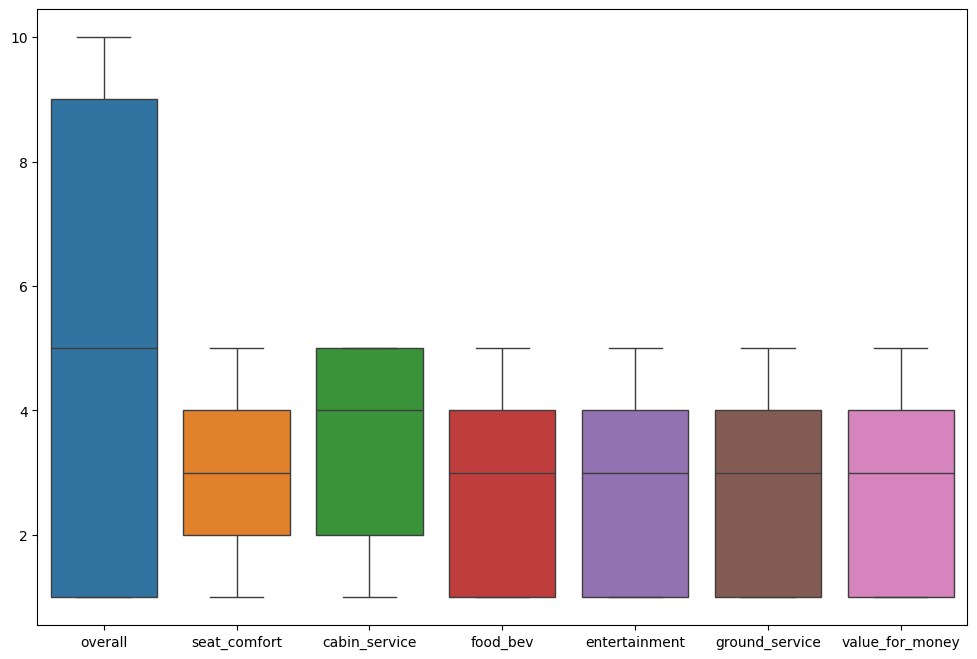

In [34]:
#Plot the boxplot for all columns to check for outliers
plt.figure(figsize=(12,8))
sns.boxplot(df)

## Data manipulation

In [35]:
#Check for Datatypes of columns in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23606 entries, 0 to 23605
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          23606 non-null  object 
 1   overall          23606 non-null  float64
 2   review_date      23606 non-null  object 
 3   traveller_type   23606 non-null  object 
 4   cabin            23606 non-null  object 
 5   date_flown       23606 non-null  object 
 6   seat_comfort     23606 non-null  float64
 7   cabin_service    23606 non-null  float64
 8   food_bev         23606 non-null  float64
 9   entertainment    23606 non-null  float64
 10  ground_service   23606 non-null  float64
 11  value_for_money  23606 non-null  float64
 12  recommended      23606 non-null  object 
dtypes: float64(7), object(6)
memory usage: 2.3+ MB


1. we can see there are many variables having not appropriate datatypes so we changed them to their suitable datatypes below.

In [36]:
d_type={'overall':'int8','review_date':'datetime64[ns]','seat_comfort':'int8','cabin_service':'int8','food_bev':'int8','entertainment':'int8',
        'ground_service':'int8',
        'value_for_money':'int8'}
for i,j in d_type.items():
  df[i]=df[i].astype(j)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23606 entries, 0 to 23605
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          23606 non-null  object        
 1   overall          23606 non-null  int8          
 2   review_date      23606 non-null  datetime64[ns]
 3   traveller_type   23606 non-null  object        
 4   cabin            23606 non-null  object        
 5   date_flown       23606 non-null  object        
 6   seat_comfort     23606 non-null  int8          
 7   cabin_service    23606 non-null  int8          
 8   food_bev         23606 non-null  int8          
 9   entertainment    23606 non-null  int8          
 10  ground_service   23606 non-null  int8          
 11  value_for_money  23606 non-null  int8          
 12  recommended      23606 non-null  object        
dtypes: datetime64[ns](1), int8(7), object(5)
memory usage: 1.2+ MB


Here we can see all columns are in their suitable datatype

2. Here converted `date_flown` column in a proper date format by removing timestamp and changed to Datetime format.

In [38]:
df['date_flown']=pd.to_datetime(df['date_flown'], errors='coerce')

3. Renamed `overall` to `overall_rating` and `date_flown` to `departure_date` for better understanding.

In [39]:
rename_col={'overall':'overall_rating','date_flown':'departure_date'}
df.rename(columns=rename_col,inplace=True)

In [40]:
df.head()

,airline,overall_rating,review_date,traveller_type,cabin,departure_date,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7,2019-05-08,Business,Economy Class,2019-05-01,4,5,4,4,2,4,yes
1,Turkish Airlines,2,2019-05-07,Family Leisure,Economy Class,2019-05-01,4,1,1,1,1,1,no
2,Turkish Airlines,3,2019-05-07,Business,Economy Class,2019-05-01,1,4,1,3,1,2,no
3,Turkish Airlines,10,2019-05-06,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,5,yes
4,Turkish Airlines,1,2019-05-06,Solo Leisure,Economy Class,2019-05-01,1,1,1,1,1,1,no


### What all manipulations have you done and insights you found?

1. Converted Date columns to datetime format as they were in object datatype and converted various rating columns from float to int as all ratings are only in integers.
2. date_flown column was not in proper date format it also contained Timestamp so we changed to a proper date format by removing timestamp and converted it into datetime datatype.
3. Renamed overall to overall_rating and date_flown to departure_date for better understanding.

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-41-4136bb643496>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=air_cnt['airline'],x=air_cnt['index'],palette =palette )


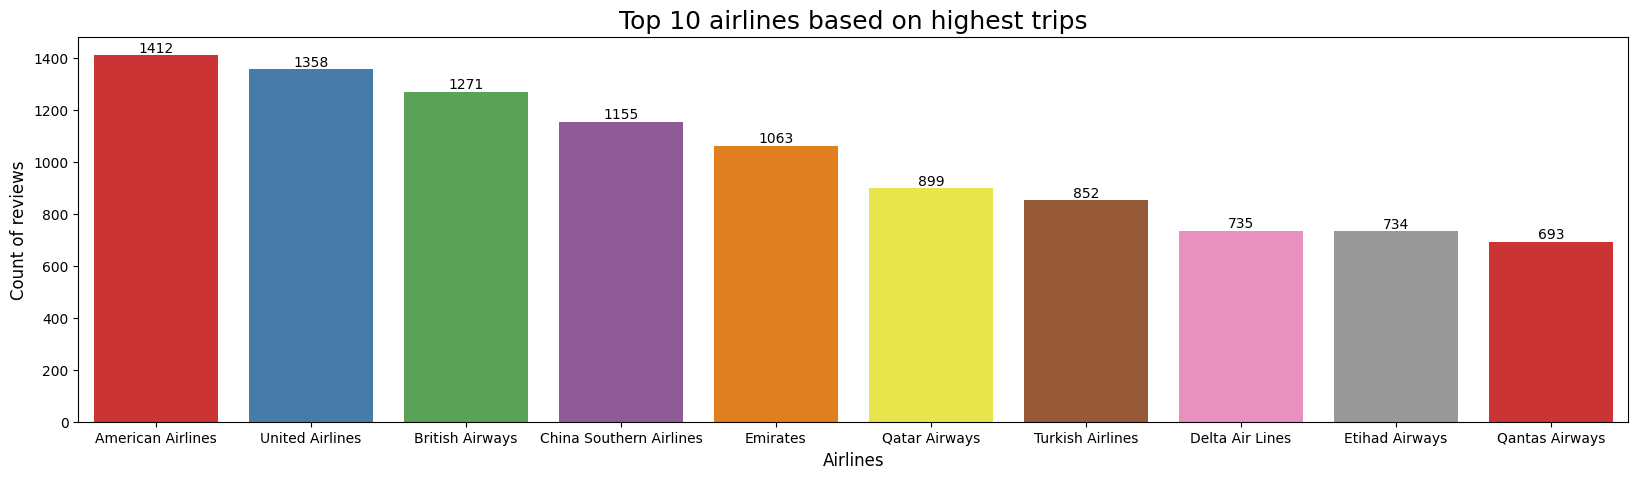

In [41]:
# Chart - 1 visualization code
plt.figure(figsize = (20,5))
air_cnt=df['airline'].value_counts().sort_values(ascending=False).head(10).reset_index()
palette = sns.color_palette("Set1", 10)
ax = sns.barplot(y=air_cnt['airline'],x=air_cnt['index'],palette =palette )
plt.xlabel('Airlines',fontsize=12)
plt.ylabel('Count of reviews',fontsize=12)
plt.title('Top 10 airlines based on highest trips',fontsize=18)
for num in ax.containers:
  ax.bar_label(num)
plt.show()

##### 1. Why did you pick the specific chart?

Bar graph is typically used when we have to depict categorical values with numerical values and here it suits well as we are to show airlines with its count of reviews

##### 2. What is/are the insight(s) found from the chart?

We have shown top 10 airlines in terms of their reviews count and can understand that American Airlines has the most number of review followed by United Airlines and Bristish Airways.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It's essential to consider the nature of the reviews, the sentiments expressed, Understanding what customers appreciate about an airline, whether it's excellent service, punctuality, or other positive aspects, can help the company leverage and enhance these strengths and Identifying common issues or complaints allows the airline to address and rectify problems, leading to an improved customer experience.

#### Chart - 2

In [42]:
cab_cnt=df['cabin'].value_counts().reset_index()


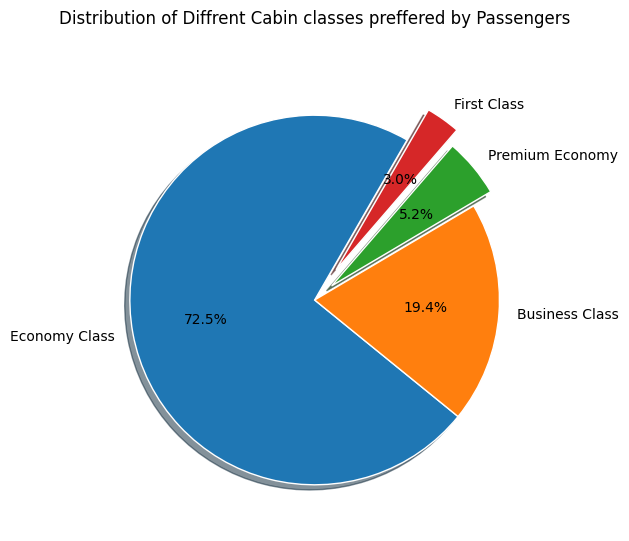

In [43]:
plt.figure(figsize=(12,6))
(plt.pie(cab_cnt['cabin'], labels=cab_cnt['index'], autopct='%1.1f%%', explode = [0, 0, 0.12, 0.2],startangle=60, textprops={'fontsize': 10},shadow=True,wedgeprops={'edgecolor': 'white'}))
plt.title('Distribution of Diffrent Cabin classes preffered by Passengers', y=1.08,fontsize = 12)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is a circular statistical graphic that is divided into slices to illustrate numerical proportions. It's primarily used to show the relationship of parts to a whole.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that econony class constitues the largest part followed by business class and the other two class constitues very less portion of the chart which tells that mostly people were travelling in economy class .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the popularity of economy class can guide the airline in customizing services to meet the needs and expectations of this larger customer segment,Given that economy class is the most popular, marketing efforts can be targeted towards this segment. Promotions, loyalty programs, and advertising can be tailored to attract and retain economy class travelers.

#### Chart - 3: `Bar Chart` for Comparing Most popular cabin type

<ipython-input-44-f73641d9608e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=most_trav['index'],y = most_trav['traveller_type'] ,palette = 'Dark2')


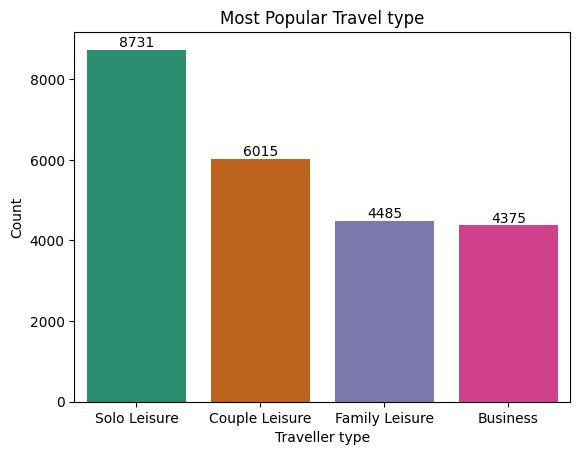

In [44]:
# Chart - 3 visualization code
most_trav = df["traveller_type"].value_counts().reset_index()
ax = sns.barplot(x=most_trav['index'],y = most_trav['traveller_type'] ,palette = 'Dark2')
plt.ylabel('Count')
plt.xlabel('Traveller type')
plt.title('Most Popular Travel type')
for num in ax.containers:
  ax.bar_label(num)
plt.show()

##### 1. Why did you pick the specific chart?

Bar graph is typically used when we have to depict categorical values with numerical values and here it suits well as we are to show air

##### 2. What is/are the insight(s) found from the chart?

`Solo Leisure` is the most preffered travel_type by passengers while `Bussiness` is the lowest travel_type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that solo leisure travel is more popular allows the airline to tailor marketing efforts specifically toward this segment. Promotions, advertising, and loyalty programs can be designed to attract and retain solo leisure travelers, potentially increasing customer acquisition and retention.

#### Chart - 4: `Side by side Bar Chart` for comparing Cabin classes based on Food_bev and entertainment ratings

*  average ratings of Food_bev and entertainment given by passenger in various cabin

In [45]:
#performing the grouphby method
eda_4=df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
eda_4

,cabin,food_bev,entertainment
0,Business Class,3.509517,3.406913
1,Economy Class,2.625146,2.688859
2,First Class,3.295775,3.284507
3,Premium Economy,2.942482,3.123254


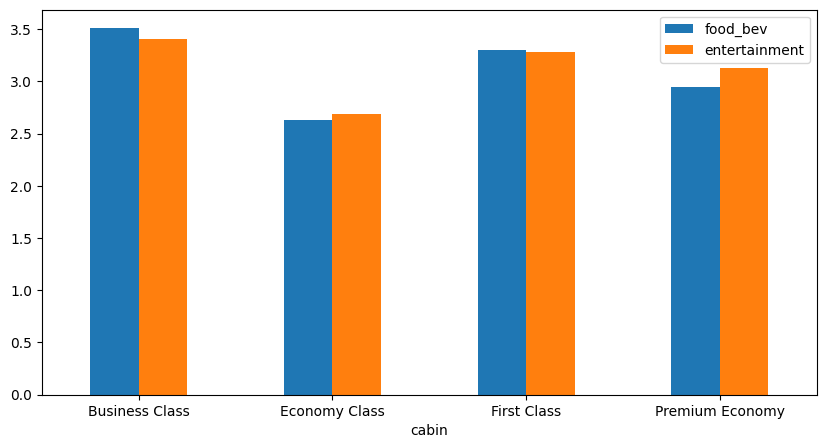

In [46]:
plt.rcParams['figure.figsize']=(10,5)
eda_4.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")
plt.xticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

This chart is best suited for showing side by side comparision of various cabin class wrt food_beverages and entertainment.

##### 2. What is/are the insight(s) found from the chart?

we can conclude that there is no significant change in ratings of `food_bev` and `entertainment` in Economy and first_class but in premium economy class there is more rating for entertainment as compared to food_bev and vice-versa for Bussiness_class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing that there are different preferences for entertainment and food_bev in Premium Economy and Business Class allows the airline to focus on enhancing services in each class selectively. This could involve improving menu options, upgrading entertainment systems, or introducing new features to align with passenger expectations

### Chart 5: Distribution of diffrent types of ratings using `Voilin Plot`

<ipython-input-47-93e2912b9765>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating Category', y='Rating', data=df_melted,palette='Set1')


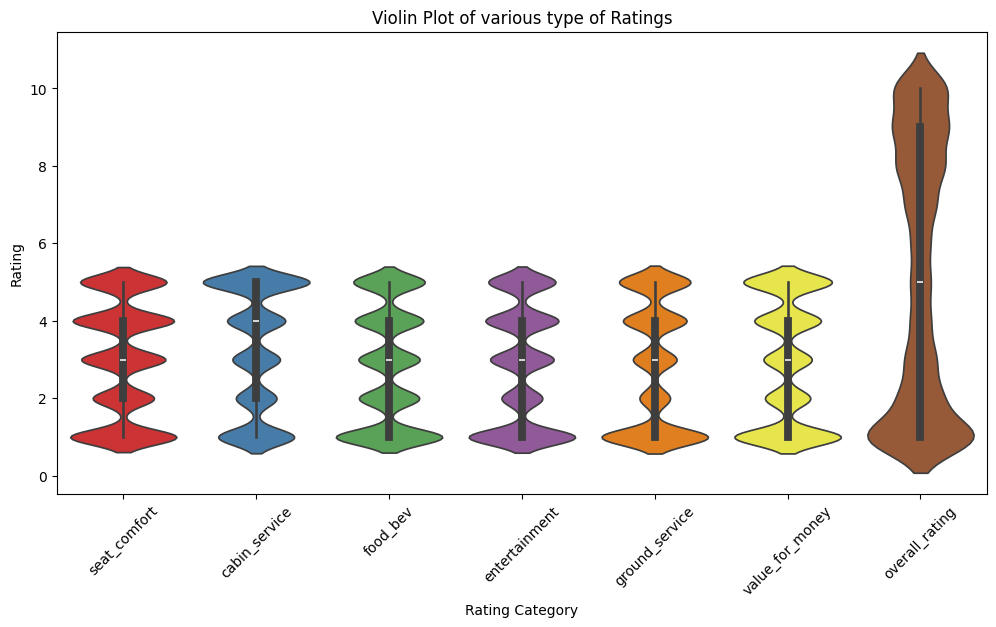

In [47]:
columns = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money','overall_rating']

# Melt the DataFrame to long format
df_melted = df.melt(value_vars=columns, var_name='Rating Category', value_name='Rating')

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Rating Category', y='Rating', data=df_melted,palette='Set1')
plt.title('Violin Plot of various type of Ratings')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

We chose `Voilin chart` because they are particularly useful for comparing the distribution of data between different groups or categories.This allows us to see not only the average rating for each type but also how ratings are spread out.

##### 2. What is/are the insight(s) found from the chart?

we can see that our mostly rating variables spreds between 1-6 and only `over_all rating` is ranging between 1-10 and mostly ratings are either lower range side or upper range side.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Airlines can use this insight to adjust pricing strategies.If customers rate the value for money lower, airlines can consider offering more competitive pricing or value-added services.hence improving specific aspects of service that are consistently rated lower can enhance the airline's brand reputation and differentiate it from competitors.

### Chart 6: Top Rated Airlines

<ipython-input-48-b3b34e8ab431>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=overall['airline'],x = overall['overall_rating'],palette ="tab10" )


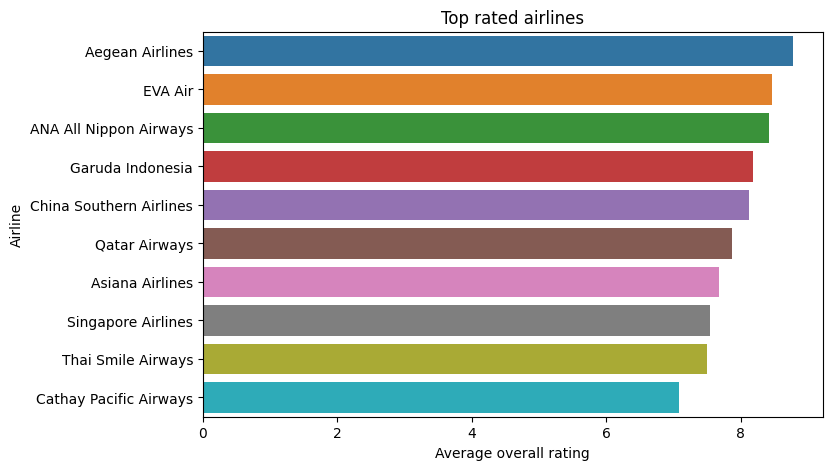

In [48]:
# Chart - 4 visualization code
plt.figure(figsize= (8,5))
overall = df.groupby(df['airline'])['overall_rating'].mean().sort_values(ascending = False).head(10).reset_index()
ax = sns.barplot(y=overall['airline'],x = overall['overall_rating'],palette ="tab10" )
plt.xlabel('Average overall rating')
plt.ylabel('Airline')
plt.title('Top rated airlines')

plt.show()

##### 1. Why did you pick the specific chart?

we pick horizontal column chart for comparison of various airlines wrt to Average overall rating.

##### 2. What is/are the insight(s) found from the chart?

from this chart we can see `Aegean airlines` is highest overall rating followed by EVA airlines and ANA all Nippon Airways while `Cathay Pecific airways` has the lowest rating .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Aegean Airlines, EVA Airlines, and ANA All Nippon Airways can continue to focus on providing excellent service to maintain their high ratings. This can include improving in-flight amenities, on-time performance, and customer service.
 Cathay Pacific Airways, being rated lower, can invest in training and development programs for its staff to enhance customer service and improve overall customer experience.

#### Chart - 7: Top 10 Airlines wrt to value for money

<ipython-input-49-ad370200cff8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=val['airline'],y = val['value_for_money'] ,palette = 'viridis')


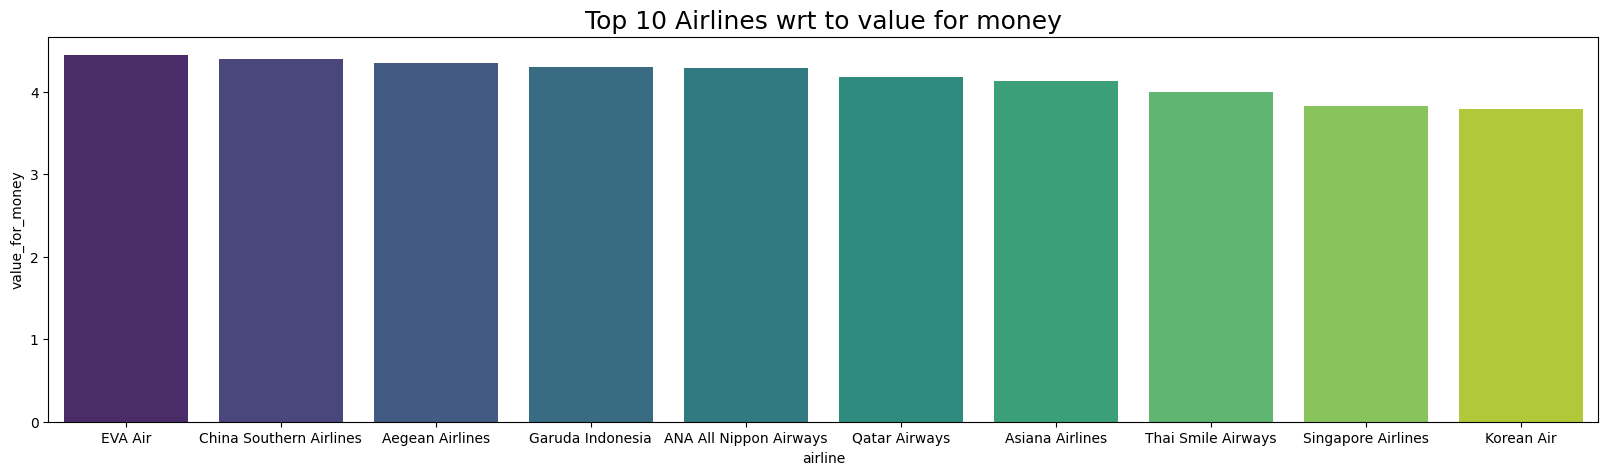

In [49]:
# Chart - 5 visualization code
plt.figure(figsize= (20,5))
val = df.groupby(df['airline'])['value_for_money'].mean().sort_values(ascending = False).head(10).reset_index()
ax = sns.barplot(x=val['airline'],y = val['value_for_money'] ,palette = 'viridis')

plt.title('Top 10 Airlines wrt to value for money',fontsize = 18)
plt.show()

##### 1. Why did you pick the specific chart?

we pick Bar chart for comparison of various airlines wrt to Average rating of value for money.

##### 2. What is/are the insight(s) found from the chart?

we can see that `EVA Air ` is the highest rated followed by China Southern Airlines and Aegean Airlines  for value for money .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

based on the above insightes EVA Air can offer loyalty programs or incentives for frequent flyers to encourage repeat business and enhance customer loyalty.

#### Chart - 8: Distribution of overall rating

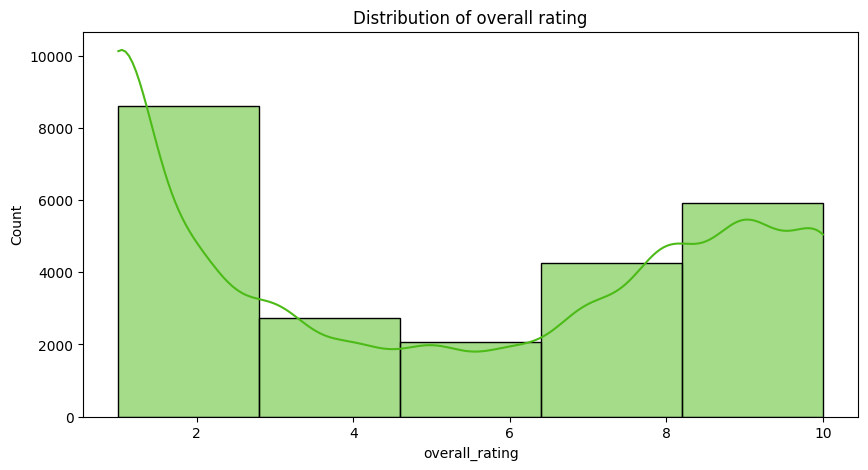

In [50]:
# Chart - 7 visualization
sns.histplot(df['overall_rating'], kde = True,bins =5,color='#4CBB17')
plt.title('Distribution of overall rating')
plt.show()

##### 1. Why did you pick the specific chart?

we chose Histogram for distribution of Overall rating.

##### 2. What is/are the insight(s) found from the chart?

we can conclude that most people have rated between either 1-2 or 8-10
it shows that passenger have either best or worst experience with airline.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Based on above insightes Airlines can focus on addressing the aspects that lead to extreme negative experiences, such as poor customer service, flight delays, or uncomfortable seating, to reduce the number of low ratings and engaging with customers who have provided extreme ratings (either low or high) can provide valuable feedback for improvement and allow airlines to address specific pain points or areas of excellence.

#### Chart - 9: Cabin Class Recommendation based on service ratings

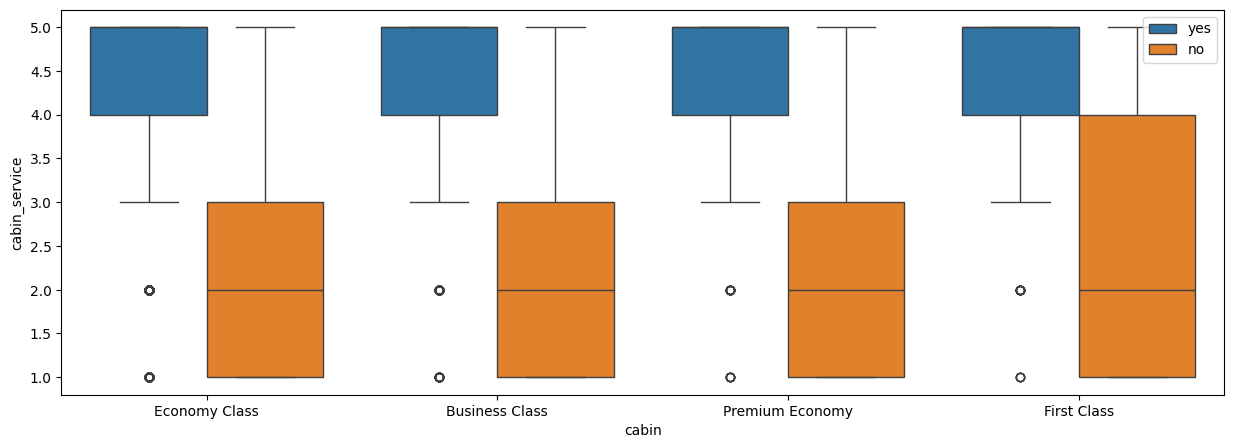

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['cabin'], y=df['cabin_service'], hue = df['recommended'])
plt.legend(loc='upper right')

##### 1. Why did you pick the specific chart?

we pick this type of Boxplot to show rating comparison between diffrent cabin classes.

##### 2. What is/are the insight(s) found from the chart?

we can see for every cabin class if the service rating is more then 3 then passenger is more likely to recommend that airline to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By focusing on enhancing service quality across all cabin classes to ensure ratings exceed 3, airlines can improve overall customer satisfaction, leading to positive recommendations and repeat business

negative-impact from insights:
If service ratings for any cabin class consistently fall below 3, it could lead to negative word-of-mouth, lower customer satisfaction, and a decline in recommendations, which could result in a loss of customers and revenue.

#### Chart - 10 - Number of reviews over months

<ipython-input-52-654db15891b9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = df2['month_name'], y = df2['count'],palette = 'Dark2')


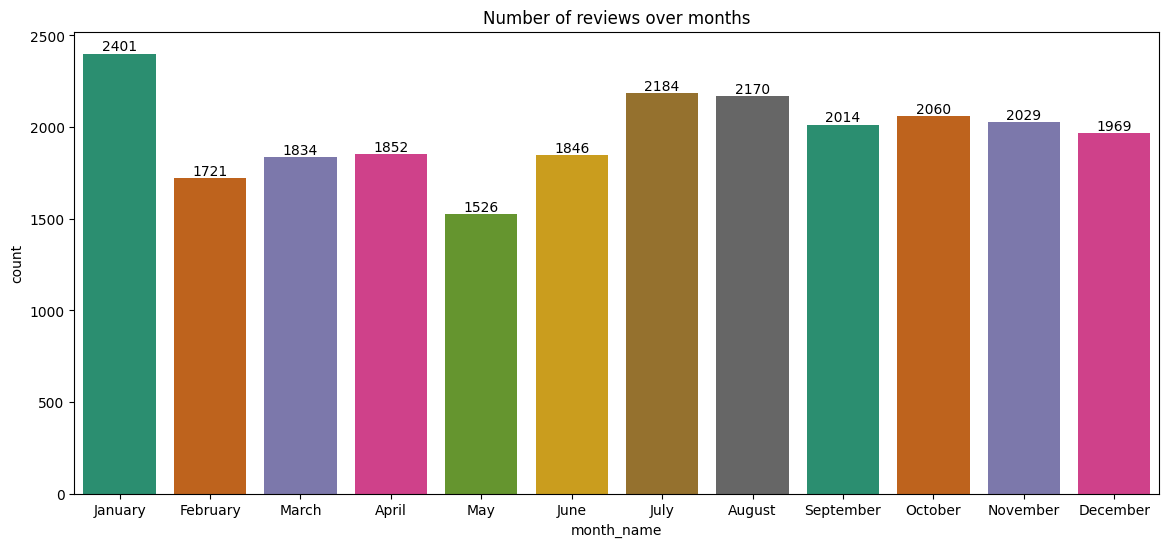

In [52]:
# Chart - 9 visualization code

plt.figure(figsize= (14,6))
plt.title('Number of reviews over months')
df['month_name'] = df['review_date'].dt.strftime('%B')
df['month'] = df['review_date'].dt.month
df2 = df[['month_name','month']].value_counts().reset_index().sort_values(by = 'month')
df2.rename(columns={0:'count'},inplace = True)
ax = sns.barplot(x = df2['month_name'], y = df2['count'],palette = 'Dark2')
for num in ax.containers:
  ax.bar_label(num)


##### 1. Why did you pick the specific chart?

Here we are plotting in which month how many reviews are submitting so with the help of this we can check is there any pattern or relation of number of reviews with the month so the best suited chart is a bar chart.

##### 2. What is/are the insight(s) found from the chart?

We can analyze from this chart that january month is having a large number of reviews as compared to others follwed by july and august while in the month of may we have the least may be january is a holiday or vacation month so more number of travellers are there so reviews is also there or the staff is not properly managing the services due to this reviews are more because passenger traffic is more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For holiday months if we are having more passenger traffic so we should employ the temporary staff to not spoil our services and management if the traffic is the reason.

#### Chart - 11 - Overall rating vs cabin type

<Axes: title={'center': 'Overall rating vs cabin type'}, xlabel='cabin', ylabel='overall_rating'>

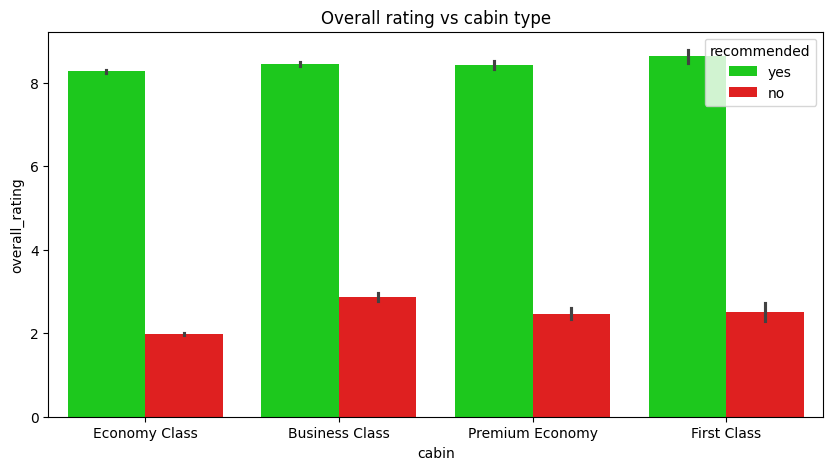

In [53]:
#Cabin type and overall service ratings (out of 10)
plt.figure(figsize=(10,5))
plt.title('Overall rating vs cabin type')
sns.barplot(x = df.cabin, y = df.overall_rating, hue = df['recommended'], palette= ['#00e500','red'])

##### 1. Why did you pick the specific chart?

Since we are plotting our categorical value against discrete numerical value so best suited chart is a side bar chart.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see from this that almost in all cabin type we have overall rating more than 8 and the customer recommend the airline to others while for no we have almost 2 rating overall in economy while 3 for rest of all, so there is no much difference between cabin type if we see recommend yes/no .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can say from above insights that if a person give overall rating more than 8 then its 99% sure that he is gonna recommend the airline to others by the help of rating we can request our customer to share their opinions on airline service on some platform for recommendation, while if person is not satisfied we will try to resolve their issue with best possible solution.

#### Chart - 12 - Correlation Heatmap

<ipython-input-54-b6a169bd92c7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True,cmap="rocket")


<Axes: title={'center': 'Correlation Heatmap'}>

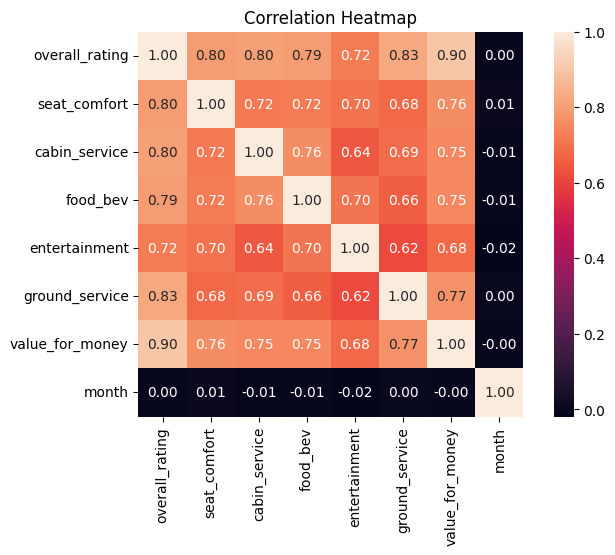

In [54]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,5))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(), annot = True, fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True,cmap="rocket")

##### 1. Why did you pick the specific chart?

This particular graph is the most powerful visualisation as it depicts the relationship of all the columns with each other and one another too.

##### 2. What is/are the insight(s) found from the chart?

Here on the graph the positive values tell us about that that particular variable is directly proportional to other one corresponding to it , the negative value indicates that the variable is indirectly proportional to corresponding varibale and larger the magnitude , more is the dependency. Also 1 indicates that if you were looking at a heatmap of a variable like value_for_money" plotted on both axes, and you saw a "1" in a cell, it would mean that when the minimum nights is high on the X-axis, it's also high on the Y-axis. When it's low on the X-axis, it's low on the Y-axis, and the relationship between these two instances of value_for_money is very strong and positive.

#### Chart - 13 - Pair Plot

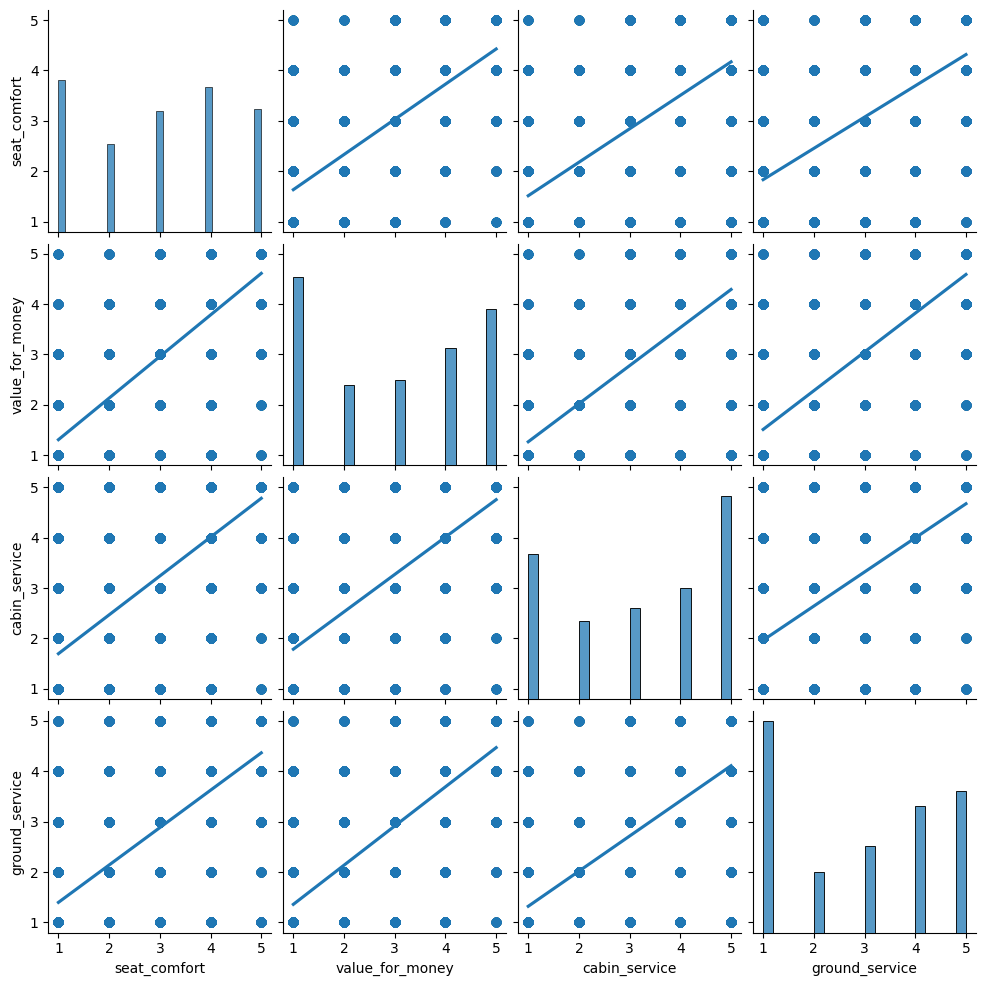

In [55]:
# Pair Plot visualization code
column_name = [ 'seat_comfort','value_for_money','cabin_service','ground_service']
pairplot_data = df[column_name]
chart15=sns.pairplot(pairplot_data,kind = 'reg')
plt.show()

##### 1. Why did you pick the specific chart?

Here we wanted to have a pairwise visualisation of all the columns in the dataset , hence used pairplot.

##### 2. What is/are the insight(s) found from the chart?

Since we have a discrete type of dataset so the distribution is showing here is not so perfect but by this we can see a positive relationship between all rating related columns.

# ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): The overall ratings for two specific airlines are equal.


* Alternative Hypothesis (H1): The overall ratings for two specific airlines are not equal.

#### 2. Perform an appropriate statistical test.

In [56]:
# Perform Statistical Test to obtain P-Value

# Calculate the means and standard deviations of the two halves
mean1 = (df[df['airline']=='Qatar Airways']['overall_rating']).mean()
mean2 = (df[df['airline']=='EVA Air']['overall_rating']).mean()
std1 = (df[df['airline']=='Qatar Airways']['overall_rating']).std()
std2 = (df[df['airline']=='EVA Air']['overall_rating']).std()

# Calculate the sample sizes
n1 = (df[df['airline']=='Qatar Airways']['overall_rating']).count()
n2 = (df[df['airline']=='EVA Air']['overall_rating']).count()

#Calculate the standard error for each airline
se1 = std1 / np.sqrt(n1)
se2 = std2 / np.sqrt(n2)

# Calculate the standard error of the difference between means
standard_error = np.sqrt(se1**2 + se2**2)

# Calculate the t_test
t_stat = (mean1 - mean2) / standard_error

#Significance level
alpha = 0.05

#Degree of freedom
dodf = n1 + n2 - 2

#calculating probability point function
cv = stats.t.ppf(1.0 - alpha, dodf)

# Calculate the p-value (two-tailed test)
p_value = (1 - stats.t.cdf(abs(t_stat), dodf)) * 2

# Set the significance level
alpha = 0.05

print('The p value for 0.05 significance level is {:.5f}'.format(p_value))

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")

The p value for 0.05 significance level is 0.00019
Reject the null hypothesis. There is a significant difference in means.


##### Which statistical test have you done to obtain P-Value?

We performed T-Test for this hypothesis testing to obtain P-value.

##### Why did you choose the specific statistical test?

 We have a sample dataset and we are making inference about population and our population parameters are not known to us and to compare the overall ratings of the two selected airlines.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): There is no association between the traveller type and the likelihood of recommending the airline.


* Alternative Hypothesis (H1): There is an association between the traveller type and the likelihood of recommending the airline.

#### 2. Perform an appropriate statistical test.

In [57]:
# Perform Statistical Test to obtain P-Value
# Create a contingency table
contingency_table = pd.crosstab(df['traveller_type'], df['recommended'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')


# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is an association between the traveller type and the likelihood of recommending the airline.")
else:
    print("Fail to reject the null hypothesis. There is no association between the traveller type and the likelihood of recommending the airline.")

Chi-square statistic: 304.72904284799944
P-value: 9.424196343911983e-66
Degrees of freedom: 3
Reject the null hypothesis. There is an association between the traveller type and the likelihood of recommending the airline.


In [58]:
df.head()

,airline,overall_rating,review_date,traveller_type,cabin,departure_date,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,month_name,month
0,Turkish Airlines,7,2019-05-08,Business,Economy Class,2019-05-01,4,5,4,4,2,4,yes,May,5
1,Turkish Airlines,2,2019-05-07,Family Leisure,Economy Class,2019-05-01,4,1,1,1,1,1,no,May,5
2,Turkish Airlines,3,2019-05-07,Business,Economy Class,2019-05-01,1,4,1,3,1,2,no,May,5
3,Turkish Airlines,10,2019-05-06,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,5,yes,May,5
4,Turkish Airlines,1,2019-05-06,Solo Leisure,Economy Class,2019-05-01,1,1,1,1,1,1,no,May,5


##### Which statistical test have you done to obtain P-Value?

We performed Chi-square Test for this hypothesis testing to obtain P-value.

##### Why did you choose the specific statistical test?

A chi-square test of independence can be used to assess whether there is a significant relationship between the traveller type and the recommended status.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): The seat comfort ratings are the same across different cabin classes.


* Alternative Hypothesis (H1): There is a significant difference in seat comfort ratings among different cabin classes.

#### 2. Perform an appropriate statistical test.

In [59]:
# Perform Statistical Test to obtain P-Value
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(df['seat_comfort'][df['cabin'] == 'First Class'],
                                df['seat_comfort'][df['cabin'] == 'Business Class'],
                                df['seat_comfort'][df['cabin'] == 'Premium Economy'],
                                df['seat_comfort'][df['cabin'] == 'Economy Class'])

# Set significance level (alpha)
alpha = 0.05


print("\nResults:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: ",p_value)

# Check for statistical significance
if p_value < alpha:
    print("\nResult: Reject the null hypothesis. There is a significant difference in seat comfort ratings.")
else:
    print("\nResult: Fail to reject the null hypothesis. No significant difference in seat comfort ratings.")


Results:
F-statistic: 628.3599335213514
P-value:  0.0

Result: Reject the null hypothesis. There is a significant difference in seat comfort ratings.


##### Which statistical test have you done to obtain P-Value?

We performed One-way ANOVA Test for this hypothesis testing to obtain P-value.

##### Why did you choose the specific statistical test?

A one way ANOVA test is used to compare the means of seat comfort ratings in different cabin classes.

# ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

We have already handled the missing values in exploratory data analysis.

#### What all missing value imputation techniques have you used and why did you use those techniques?

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

The dataset had no outliers so there was no need of handling as such.

### 3. Categorical Encoding

In [60]:
# Encode your categorical columns
label_encode = LabelEncoder()
df['recommended'] = label_encode.fit_transform(df['recommended'])

In [61]:
df['cabin'].unique()

array(['Economy Class', 'Business Class', 'Premium Economy',
       'First Class'], dtype=object)

In [62]:

ordinal_encoder = ce.OrdinalEncoder(mapping=[{'col': 'cabin', 'mapping': {'Economy Class': 1, 'Business Class': 3,'Premium Economy' : 2,'First Class' :4}}])
df['cabin']= ordinal_encoder.fit_transform(df['cabin'])

In [63]:
one_hot_encoder = ce.OneHotEncoder(cols=['traveller_type'])
df = one_hot_encoder.fit_transform(df)


#### What all categorical encoding techniques have you used & why did you use those techniques?

As we can not give categorical values in machine learning model so we need to encode them with numerical values . Wr have use different techniques of encoding for different columns


For the **"Traveller_Type"** column, which appears to represent categorical data with different types of travelers (e.g., Solo Leisure), it's appropriate to use one-hot encoding. One-hot encoding is commonly used for categorical variables with multiple levels, where each level is treated as a distinct category.

For **"Cabin" column** : There is a clear ordinal relationship, where the different cabin classes have a meaningful and consistent order (e.g., Economy < Premium Economy < Business < First Class), then ordinal encoding could be a suitable choice. In this case, each category is assigned a numerical value based on its order.

For **"recommended"** column : Since we have two categories like "Yes" and "No, we used label encoding. Label encoding involves assigning a numerical label to each unique category. For "Yes" and "No," you could encode them as 1 and 0, respectively.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

...........

#### 2. Feature Selection

In [64]:
df[['overall_rating','seat_comfort','food_bev','cabin_service','entertainment','ground_service','value_for_money','recommended']].corr()

,overall_rating,seat_comfort,food_bev,cabin_service,entertainment,ground_service,value_for_money,recommended
overall_rating,1.000000,0.795892,0.793299,0.802345,0.720355,0.826567,0.899440,0.899921
seat_comfort,0.795892,1.000000,0.720664,0.715203,0.698042,0.678297,0.758516,0.725536
food_bev,0.793299,0.720664,1.000000,0.759962,0.704976,0.655019,0.747458,0.729327
cabin_service,0.802345,0.715203,0.759962,1.000000,0.643760,0.686711,0.748290,0.742769
entertainment,0.720355,0.698042,0.704976,0.643760,1.000000,0.615235,0.679103,0.648191
ground_service,0.826567,0.678297,0.655019,0.686711,0.615235,1.000000,0.772872,0.755555
value_for_money,0.899440,0.758516,0.747458,0.748290,0.679103,0.772872,1.000000,0.839698
recommended,0.899921,0.725536,0.729327,0.742769,0.648191,0.755555,0.839698,1.000000


In [65]:
# Manipulate Features to minimize feature correlation and create new features
df.drop('overall_rating',axis = 1 ,inplace = True)

In [66]:
df.drop(columns = ['review_date','month_name','month','departure_date','airline'],inplace = True)

##### What all feature selection methods have you used  and why?

Feature selection is the process of choosing a subset of relevant features (variables, predictors) for use in model construction

We basically used **filter method** which evaluate the relevance of features based on statistical measures or scores calculated independently of the machine learning algorithm.

Here we used **Correlation coefficient** that Measures the linear relationship between two variables. Features with high correlation to the target variable or with other features may be considered redundants and so is the reason we dropped overall_rating column.

Columns like **'review_date'** and **'departure_date**' represent date or time-related information, which is not directly interpretable by most machine learning algorithms.

Additionally **'month'** and **'month_name'** are the columns that we made for analysis purpose so model do not require to get trained with these so dropping them too.

Column **'airline'** is basically the name of the airline which is again not relevant for the model to get trained on.

##### Which all features you found important and why?

Features like

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [67]:
# Transform Your data

### 6. Data Scaling


Scaling data is used to standardize the range of independent variables or features. It's particularly useful when features have different scales or units of measurement, and here the features are on the same scale so there is no need of scaling.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [68]:
# DImensionality Reduction (If needed)
pca = PCA()
airline_pca = pca.fit_transform(df.iloc[:,:-1])

# Convert PCA components to a DataFrame for better readability
airline_pca_df = pd.DataFrame(data=airline_pca, columns=[f'PC{i+1}' for i in range(len(df.iloc[:,:-1].columns))])

# Display the first few rows of the PCA components
airline_pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,2.070393,1.428316,0.618929,-1.135548,-0.532652,-0.322191,-0.515596,-0.338921,0.508617,-0.870371,-6.410040e-14
1,-3.680837,0.286059,-0.107188,0.611248,-2.223497,-0.405250,1.242758,-0.388525,0.523960,0.571746,1.082815e-13
2,-2.385443,0.773661,0.245561,-0.975510,0.933024,-1.547353,-1.441613,-0.137523,0.537017,-0.808443,-3.813092e-14
3,4.549565,-0.013720,-0.749364,-0.849939,0.582719,0.326775,0.038773,0.593661,-0.086591,-0.080484,5.183352e-17
4,-4.821540,-0.150894,-0.223891,-0.174165,-0.029129,0.259793,0.025479,0.791683,-0.138801,0.018637,1.737835e-17


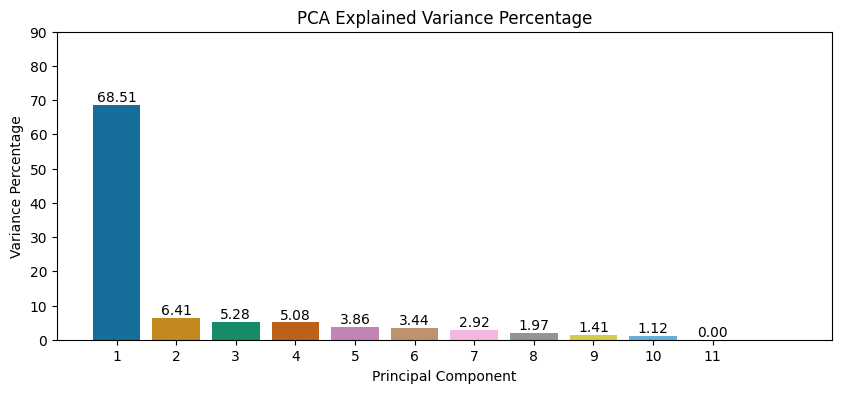

In [69]:
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(10, 4))
op=sns.barplot(x=range(1, len(explained_variance) + 1), y=explained_variance*100, hue=range(1, len(explained_variance) + 1),palette='colorblind',legend=False)
plt.ylabel('Variance Percentage')
plt.xlabel('Principal Component')
plt.title('PCA Explained Variance Percentage')
for i, num in enumerate(explained_variance):
    op.text(i, num * 100+1, f'{num*100:.2f}',ha='center')
plt.ylim(0 , 90)
plt.xlim(-1 , 12)
plt.show()


In [70]:
pca.explained_variance_ratio_

array([6.85067996e-01, 6.41142409e-02, 5.28158426e-02, 5.08093143e-02,
       3.86332564e-02, 3.43927958e-02, 2.91889266e-02, 1.96717928e-02,
       1.41320401e-02, 1.11737948e-02, 4.66878975e-32])

In [71]:
for i in range(1,len(explained_variance)):
  print(f'Sum of percentage of variance of {i} columns',round(sum(explained_variance[0:i]*100),2))

Sum of percentage of variance of 1 columns 68.51
Sum of percentage of variance of 2 columns 74.92
Sum of percentage of variance of 3 columns 80.2
Sum of percentage of variance of 4 columns 85.28
Sum of percentage of variance of 5 columns 89.14
Sum of percentage of variance of 6 columns 92.58
Sum of percentage of variance of 7 columns 95.5
Sum of percentage of variance of 8 columns 97.47
Sum of percentage of variance of 9 columns 98.88
Sum of percentage of variance of 10 columns 100.0


In [72]:
pca_2 = PCA(n_components=6)
airline_pca_2 = pca_2.fit_transform(df.iloc[:,:-1])

# Shape after reduction
print("Original Shape:", df.iloc[:,:-1].shape)
print("Transformed Shape:", airline_pca_2.shape)

Original Shape: (23606, 11)
Transformed Shape: (23606, 6)


In [73]:
airline_pca_2_df = pd.DataFrame(data=airline_pca_2, columns=[f'PC{i+1}' for i in range(len(df.iloc[:,:6].columns))])

In [74]:
airline_pca_2_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6
0,2.070393,1.428316,0.618929,-1.135548,-0.532652,-0.322191
1,-3.680837,0.286059,-0.107188,0.611248,-2.223497,-0.405250
2,-2.385443,0.773661,0.245561,-0.975510,0.933024,-1.547353


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [75]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = airline_pca_2_df
y = df.iloc[:,-1]

In [76]:
x

,PC1,PC2,PC3,PC4,PC5,PC6
0,2.070393,1.428316,0.618929,-1.135548,-0.532652,-0.322191
1,-3.680837,0.286059,-0.107188,0.611248,-2.223497,-0.405250
2,-2.385443,0.773661,0.245561,-0.975510,0.933024,-1.547353
3,4.549565,-0.013720,-0.749364,-0.849939,0.582719,0.326775
4,-4.821540,-0.150894,-0.223891,-0.174165,-0.029129,0.259793
...,...,...,...,...,...,...
23601,-4.842669,-0.129199,-0.242985,-0.149813,-0.004472,0.245907
23602,-4.423351,-0.140142,0.296017,-0.537009,0.209999,-0.320822
23603,3.681277,0.492625,0.267110,-0.773627,-0.378874,0.066324
23604,-4.821540,-0.150894,-0.223891,-0.174165,-0.029129,0.259793


In [77]:
y

0        1
1        0
2        0
3        1
4        0
        ..
23601    0
23602    0
23603    1
23604    0
23605    0
Name: recommended, Length: 23606, dtype: int64

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [78]:
# Handling Imbalanced Dataset (If needed)
y.value_counts()

0    12338
1    11268
Name: recommended, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

# ***7. ML Model Implementation***

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [80]:
print('Shape of X_train',X_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (16524, 6)
Shape of y_train (16524,)
Shape of X_test (7082, 6)
Shape of y_test (7082,)


### ML Model - 1 - Decision Tree

In [81]:
# ML Model - 1 Implementation

model = DecisionTreeClassifier()

# Fit the Algorithm
model.fit(X_train, y_train)
# Predict on the model
prediction = model.predict(X_test)

In [82]:
print("Accuracy on test data:", accuracy_score(y_test, prediction))
print("Precision on test data:", precision_score(y_test, prediction))
print("Recall on test data:", recall_score(y_test, prediction))
print("F1_score on test data:", f1_score(y_test, prediction))

Accuracy on test data: 0.9125953120587404
Precision on test data: 0.914811516770555
Recall on test data: 0.9027533684827183
F1_score on test data: 0.9087424443461595


In [83]:
# ML Model - 1 Implementation

model1 = DecisionTreeClassifier()

# Fit the Algorithm
model1.fit(X_train, y_train)
# Predict on the model
prediction1 = model1.predict(X_train)

In [84]:
print("Accuracy on training data:", accuracy_score(y_train, prediction1))
print("Precision on training data:", precision_score(y_train, prediction1))
print("Recall on training data:", recall_score(y_train, prediction1))
print("F1_score on training data:", f1_score(y_train, prediction1))

Accuracy on training data: 0.9891672718470104
Precision on training data: 0.9943320881102666
Recall on training data: 0.9828113063407181
F1_score on training data: 0.98853813152334


In [85]:
cm = confusion_matrix(y_test, prediction)

In [86]:
cm

array([[3381,  287],
       [ 332, 3082]])

[Text(0, 0.5, 'Recommended'), Text(0, 1.5, 'Not Recommend')]

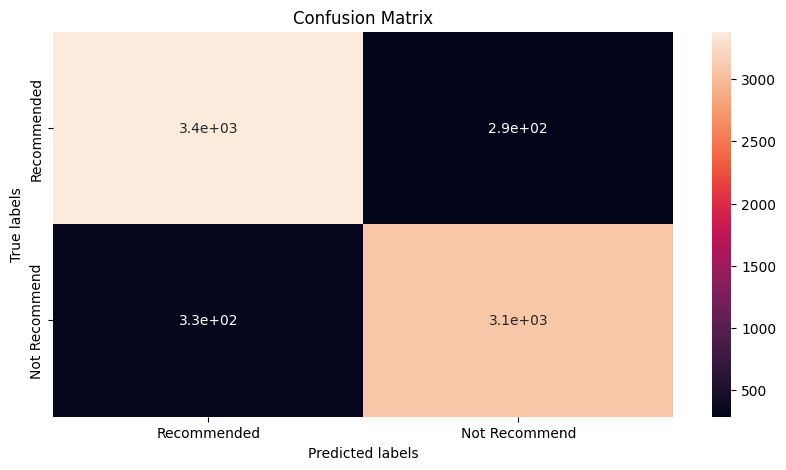

In [87]:
ax= plt.subplot()
labels = ['Recommended', 'Not Recommend']
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [88]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [89]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
dt_classifier = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Fit the Algorithm
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Predict on the
best_params = grid_search.best_params_

In [90]:
best_params

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [91]:
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)
prediction2 = best_dt_classifier.predict(X_test)

In [92]:
print("Accuracy on test data:", accuracy_score(y_test, prediction2))
print("Precision on test data:", precision_score(y_test, prediction2))
print("Recall on test data:", recall_score(y_test, prediction2))
print("F1_score on test data:", f1_score(y_test, prediction2))

Accuracy on test data: 0.9344817848065519
Precision on test data: 0.9317915690866511
Recall on test data: 0.9323374340949033
F1_score on test data: 0.932064421669107


In [93]:
best_dt_classifier1 = DecisionTreeClassifier(**best_params)
best_dt_classifier1.fit(X_train, y_train)
prediction3 = best_dt_classifier1.predict(X_train)

In [94]:
print("Accuracy on test data:", accuracy_score(y_train, prediction3))
print("Precision on test data:", precision_score(y_train, prediction3))
print("Recall on test data:", recall_score(y_train, prediction3))
print("F1_score on test data:", f1_score(y_train, prediction3))

Accuracy on test data: 0.941600096828855
Precision on test data: 0.9396298659859604
Recall on test data: 0.9373567608861727
F1_score on test data: 0.9384919370259418


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [95]:
knn = KNeighborsClassifier()

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

In [96]:
print("Accuracy on test data:", accuracy_score(y_test, y_pred_knn))
print("Precision on test data:", precision_score(y_test, y_pred_knn))
print("Recall on test data:", recall_score(y_test, y_pred_knn))
print("F1_score on test data:", f1_score(y_test,y_pred_knn))

Accuracy on test data: 0.9274216323072578
Precision on test data: 0.9262198706643151
Recall on test data: 0.9229642647920328
F1_score on test data: 0.9245892018779343


In [97]:
knn1 = KNeighborsClassifier()

# Train the classifier
knn1.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn1 = knn1.predict(X_train)

In [98]:
print("Accuracy on training data:", accuracy_score(y_train, y_pred_knn1))
print("Precision on training data:", precision_score(y_train, y_pred_knn1))
print("Recall on training data:", recall_score(y_train, y_pred_knn1))
print("F1_score on training data:", f1_score(y_train,y_pred_knn1))

Accuracy on training data: 0.9492253691600097
Precision on training data: 0.9481282739235978
Recall on training data: 0.9448688566335626
F1_score on training data: 0.9464957591990306


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [99]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search1 = GridSearchCV(knn, param_grid, cv=5, scoring='f1')

# Fit GridSearchCV to the training data
grid_search1.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search1.best_params_
best_score = grid_search1.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the testing set
best_model = grid_search1.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Score: 0.934111649910415
Test Set Score: 0.9349053939565095


In [100]:
curr_parm_knn = best_model.get_params()
curr_parm_knn

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'uniform'}

In [101]:
knn1_hy = KNeighborsClassifier(**curr_parm_knn)

# Train the classifier
knn1_hy.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn1_hy = knn1_hy.predict(X_test)

In [102]:
print("Accuracy on test data:", accuracy_score(y_test,y_pred_knn1_hy))
print("Precision on test data:", precision_score(y_test, y_pred_knn1_hy))
print("Recall on test data:", recall_score(y_test, y_pred_knn1_hy))
print("F1_score on test data:", f1_score(y_test,y_pred_knn1_hy))

Accuracy on test data: 0.9349053939565095
Precision on test data: 0.9336270190895741
Recall on test data: 0.9311657879320445
F1_score on test data: 0.9323947792931515


In [103]:
knn1_hy1 = KNeighborsClassifier(**curr_parm_knn)

# Train the classifier
knn1_hy1.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn1_hy1 = knn1_hy1.predict(X_train)

In [104]:
print("Accuracy on training data:", accuracy_score(y_train, y_pred_knn1_hy1))
print("Precision on training data:", precision_score(y_train, y_pred_knn1_hy1))
print("Recall on training data:", recall_score(y_train, y_pred_knn1_hy1))
print("F1_score on training data:", f1_score(y_train,y_pred_knn1_hy1))

Accuracy on training data: 0.9461994674412975
Precision on training data: 0.9445933869526363
Recall on training data: 0.9420677361853832
F1_score on training data: 0.9433288710397144


[Text(0, 0.5, 'Recommended'), Text(0, 1.5, 'Not Recommend')]

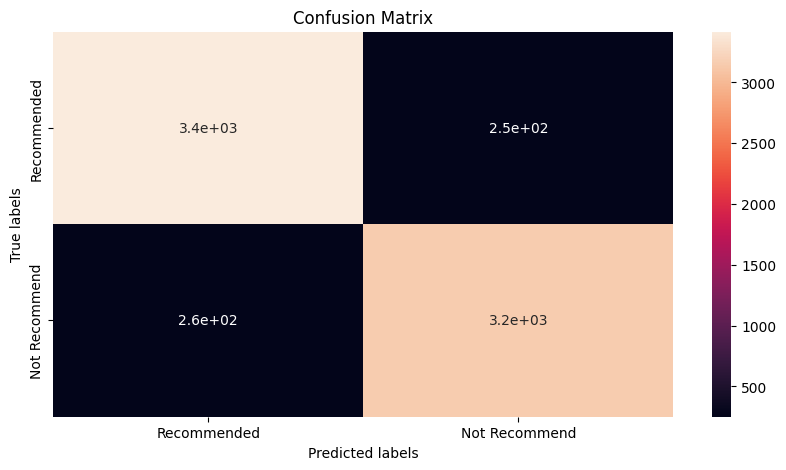

In [105]:
cfu = confusion_matrix(y_test, y_pred_knn)
ax= plt.subplot()
labels = ['Recommended', 'Not Recommend']
sns.heatmap(cfu, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [106]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
svm_model = SVC(kernel='rbf', gamma = 'auto', random_state=42)
svm_model.fit(X_train,y_train)
pred_svm = svm_model.predict(X_test)


In [107]:
print("Accuracy on test data:", accuracy_score(y_test, pred_svm))
print("Precision on test data:", precision_score(y_test, pred_svm))
print("Recall on test data:", recall_score(y_test, pred_svm))
print("F1_score on test data:", f1_score(y_test,pred_svm))

Accuracy on test data: 0.9388590793561141
Precision on test data: 0.9392867668729737
Recall on test data: 0.9335090802577621
F1_score on test data: 0.9363890113118849


In [108]:
pred_svm1 = svm_model.predict(X_train)

In [109]:
print("Accuracy on training data:", accuracy_score(y_train, pred_svm1))
print("Precision on training data:", precision_score(y_train, pred_svm1))
print("Recall on training data:", recall_score(y_train, pred_svm1))
print("F1_score on training data:", f1_score(y_train,pred_svm1))

Accuracy on training data: 0.9453522149600581
Precision on training data: 0.9466649530908624
Recall on training data: 0.9378660555131143
F1_score on training data: 0.942244963223537


In [110]:
y_train.min()

0

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [111]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [131]:


# Define the parameter grid to search
param_grid_svm = {'C': [0.1, 1, 10,15],  # Regularization parameter
              'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient (only for RBF kernel)
              'kernel': ['linear', 'rbf']}  # Kernel type

# Create an SVM model
svm_model = SVC()

# Perform grid search with 5-fold cross-validation
random_search = RandomizedSearchCV(svm_model, param_grid_svm,verbose=2,random_state = 42 ,cv=5,scoring='f1')
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_svm = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best SVM model
best_svm_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_svm = best_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........................C=15, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END ........................C=15, gamma=0.1, kernel=rbf; total time=   4.8s
[CV] END ........................C=15, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END ........................C=15, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END ........................C=15, gamma=0.1, kernel=rbf; total time=   4.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   5.6s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   4.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   5.7s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   4.7s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   4.6s
[CV] END ...................C=15, gamma=0.001, kernel=linear; total time=   6.5s
[CV] END ...................C=15, gamma=0.001, k

In [113]:
curr_param_svm = best_svm_model.get_params()
curr_param_svm

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [132]:
svm_model = SVC(**curr_param_svm)
svm_model.fit(X_train,y_train)
pred_svm1 = svm_model.predict(X_test)

In [133]:
print("Accuracy on test data:", accuracy_score(y_test, pred_svm1))
print("Precision on test data:", precision_score(y_test, pred_svm1))
print("Recall on test data:", recall_score(y_test, pred_svm1))
print("F1_score on test data:", f1_score(y_test,pred_svm1))

Accuracy on test data: 0.9377294549562271
Precision on test data: 0.935285505124451
Recall on test data: 0.9355594610427651
F1_score on test data: 0.9354224630253332


In [134]:
svm_model1 = SVC(**curr_param_svm)
svm_model1.fit(X_train,y_train)
pred_svm2 = svm_model.predict(X_train)

In [135]:
print("Accuracy on training data:", accuracy_score(y_train, pred_svm2))
print("Precision on training data:", precision_score(y_train, pred_svm2))
print("Recall on training data:", recall_score(y_train, pred_svm2))
print("F1_score on training data:", f1_score(y_train,pred_svm2))

Accuracy on training data: 0.9403897361413701
Precision on training data: 0.9398130362402356
Recall on training data: 0.9344283167812579
F1_score on training data: 0.9371129413266935


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

##ML Model - 4

In [118]:

rf = RandomForestClassifier()

# Fit the Algorithm
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf =rf.predict(X_test)

In [119]:
print("Accuracy on test data:", accuracy_score(y_test, y_pred_rf))
print("Precision on test data:", precision_score(y_test, y_pred_rf))
print("Recall on test data:", recall_score(y_test, y_pred_rf))
print("F1_score on test data:", f1_score(y_test,y_pred_rf))

Accuracy on test data: 0.9303868963569613
Precision on test data: 0.9299381807477186
Recall on test data: 0.9253075571177505
F1_score on test data: 0.9276170900014682


In [120]:

rf1 = RandomForestClassifier()

# Fit the Algorithm
rf1.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 =rf1.predict(X_train)

In [121]:
print("Accuracy on training data:", accuracy_score(y_train, y_pred_rf1))
print("Precision on training data:", precision_score(y_train, y_pred_rf1))
print("Recall on training data:", recall_score(y_train, y_pred_rf1))
print("F1_score on training data:", f1_score(y_train,y_pred_rf1))

Accuracy on training data: 0.9891672718470104
Precision on training data: 0.9874253778737457
Recall on training data: 0.9898141074611663
F1_score on training data: 0.9886182997393018


In [122]:
param_grid_rf = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [1,2,6,7,8,9,10,20,30,40],
    'min_samples_split':[5,10,20,30,40,50,100,150,200],
    'min_samples_leaf': [1,2,8,10,20,40,50]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_grid_rf,verbose=2,random_state = 42 ,cv=5,scoring='f1')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best estimator
best_model_rf_rs = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   5.1s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   6.2s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   5.1s
[CV] END max_depth=8, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   5.9s
[CV] END max_depth=8, min_

In [123]:
best_model_rf_rs.feature_importances_
print(best_model_rf_rs)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=30,
                       n_estimators=200)


In [124]:
curr_param = best_model_rf_rs.get_params()
curr_param

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 30,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [125]:
rf3 = RandomForestClassifier(**curr_param)

# Fit the Algorithm
rf3.fit(X_train,y_train)

# Predict on the model
y_pred_rf3 =rf3.predict(X_test)

In [126]:
print("Accuracy on test data:", accuracy_score(y_test, y_pred_rf3))
print("Precision on test data:", precision_score(y_test, y_pred_rf3))
print("Recall on test data:", recall_score(y_test, y_pred_rf3))
print("F1_score on test data:", f1_score(y_test,y_pred_rf3))

Accuracy on test data: 0.9368822366563118
Precision on test data: 0.9374815688587438
Recall on test data: 0.9311657879320445
F1_score on test data: 0.9343130051432771


In [127]:
rf4 = RandomForestClassifier(**curr_param)

# Fit the Algorithm
rf4.fit(X_train,y_train)

# Predict on the model
y_pred_rf4 =rf4.predict(X_train)

In [128]:
print("Accuracy on training data:", accuracy_score(y_train, y_pred_rf4))
print("Precision on training data:", precision_score(y_train, y_pred_rf4))
print("Recall on training data:", recall_score(y_train, y_pred_rf4))
print("F1_score on training data:", f1_score(y_train,y_pred_rf4))

Accuracy on training data: 0.950556765916243
Precision on training data: 0.9518428149479903
Recall on training data: 0.9437229437229437
F1_score on training data: 0.9477654881401445


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [129]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [130]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***